# Hedonic Pricing

We often try to predict the price of an asset from its observable characteristics. This is generally called **hedonic pricing**: How do the unit's characteristics determine its market price?

In the lab folder, there are three options: housing prices in pierce_county_house_sales.csv, car prices in cars_hw.csv, and airbnb rental prices in airbnb_hw.csv. If you know of another suitable dataset, please feel free to use that one.

1. Clean the data and perform some EDA and visualization to get to know the data set.
2. Transform your variables --- particularly categorical ones --- for use in your regression analysis.
3. Implement an ~80/~20 train-test split. Put the test data aside.
4. Build some simple linear models that include no transformations or interactions. Fit them, and determine their RMSE and $R^2$ on the both the training and test sets. Which of your models does the best?
5. Include transformations and interactions, and build a more complex model that reflects your ideas about how the features of the asset determine its value. Determine its RMSE and $R^2$ on the training and test sets. How does the more complex model your build compare to the simpler ones?

Interestingly, the more complicated linear model worked better because it captured more of the complexity and nuances in the data allowing for a better prediction. We can see the effects of the body_type on the predicted price, however I don't think we can see exactly how the body_type predicts the price of each make, which in this scenario I dont think is nessiscary.



6. Summarize your results from 1 to 5. Have you learned anything about overfitting and underfitting, or model selection?

You need to look at the RMSE and R2 values of both your test and training date set in order to understand if the model is overfitted or underfitted.


7. If you have time, use the sklearn.linear_model.Lasso to regularize your model and select the most predictive features. Which does it select? What are the RMSE and $R^2$? We'll cover the Lasso later in detail in class.



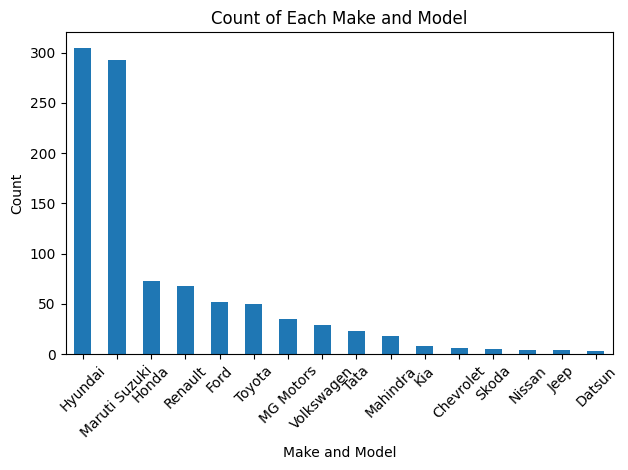

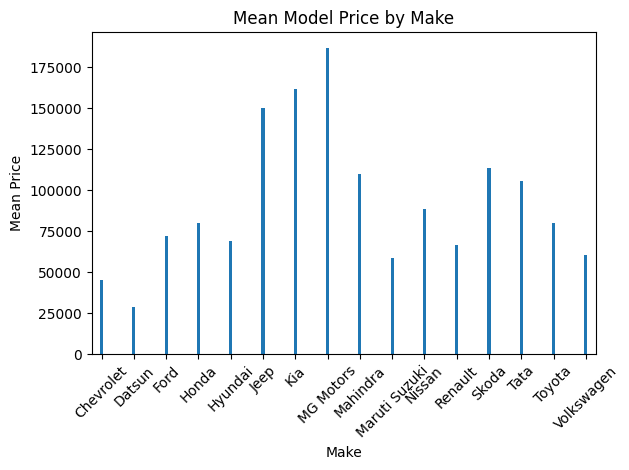

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


df = pd.read_csv('cars_hw.csv')

#pretty sure a volkswagon would not be 657,000 so I dividided by 10
df['Price'] = df['Price'] / 10


make_model_counts = df['Make'].value_counts()

# Create bar graph, obtained from Chat, we can seee how Hyundai is the most common, followed by maruti suzuki
make_model_counts.plot(kind='bar')
plt.title('Count of Each Make and Model')
plt.xlabel('Make and Model')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



mean_model_price = df.groupby("Make")['Price'].mean() #it seems MGmotor is the most pricey, followed by KIA

mean_model_price.plot(kind='bar', width=.1)
plt.title('Mean Model Price by Make')
plt.xlabel('Make')
plt.ylabel('Mean Price')
plt.xticks(rotation=45)
plt.tight_layout()  # Adjust layout to make room for x labels
plt.show()

Part 2 & 3

In [14]:
#Transformation of variables
from sklearn import linear_model
from sklearn.model_selection import train_test_split


N = df.shape[0]
df = df.sample(frac=1, random_state=100) # randomize the order in which data appears
train_size = int(.8*N)


df = df.sample(frac=1, random_state=100)
train_size = int(0.8 * N)

# Define train/test sets
df_train = df.iloc[:train_size]
df_test = df.iloc[train_size:]

# Define target variable
y_train = df_train['Price']
y_test = df_test['Price']

#simple linear regression
X_train = pd.get_dummies(df_train[['Make']], dtype='int')
X_test = pd.get_dummies(df_test[['Make']], dtype='int')


X_test = X_test.reindex(columns=X_train.columns, fill_value=0)


reg = LinearRegression(fit_intercept=False).fit(X_train, y_train)


y_hat = reg.predict(X_test)
print('Rsq: ', reg.score(X_test, y_test))  # R^2 score

rmse = np.sqrt(np.mean((y_test - y_hat) ** 2))
print('RMSE: ', rmse)  # RMSE

# Coefficients
results = pd.DataFrame({'variable': reg.feature_names_in_, 'coefficient': reg.coef_})
results


Rsq:  0.3750111694500292
RMSE:  26580.52094625647


,variable,coefficient
0,Make_Chevrolet,52975.000000
1,Make_Datsun,28450.000000
2,Make_Ford,73559.574468
3,Make_Honda,82240.350877
4,Make_Hyundai,68786.475410
5,Make_Jeep,149950.000000
6,Make_Kia,161842.857143
7,Make_MG Motors,187145.161290
8,Make_Mahindra,108460.000000
9,Make_Maruti Suzuki,59447.111111


In [11]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


N = df.shape[0]
df = df.sample(frac=1, random_state=100)
train_size = int(0.8 * N)

# Define train/test sets
df_train = df.iloc[:train_size]
df_test = df.iloc[train_size:]

# Define target variable
y_train = df_train['Price']
y_test = df_test['Price']

X_train = df_train[['Make', 'Body_Type']]
X_test = df_test[['Make', 'Body_Type']]

# One-hot encoding for categorical variables (both 'Make' and 'Body_Type')
Z_train = pd.get_dummies(X_train, columns=['Make', 'Body_Type'], dtype='int')
Z_test = pd.get_dummies(X_test, columns=['Make', 'Body_Type'], dtype='int')

# Align columns of Z_train and Z_test to avoid any missing columns after encoding
Z_test = Z_test.reindex(columns=Z_train.columns, fill_value=0)

# Fit the linear regression model
reg = LinearRegression(fit_intercept=False).fit(Z_train, y_train)

# Predictions and evaluation
y_hat = reg.predict(Z_test)
print('Rsq: ', reg.score(Z_test, y_test)) # R^2 score

rmse = np.sqrt(np.mean((y_test - y_hat) ** 2))
print('RMSE: ', rmse)

# Regression coefficients
results = pd.DataFrame({'variable': reg.feature_names_in_, 'coefficient': reg.coef_})
results


Rsq:  0.7013085129223571
RMSE:  21053.16089252722


,variable,coefficient
0,Make_Chevrolet,-8337.344301
1,Make_Datsun,-19326.015826
2,Make_Ford,-3869.502502
3,Make_Honda,6516.422119
4,Make_Hyundai,8785.328057
5,Make_Jeep,56230.855148
6,Make_Kia,70347.521815
7,Make_MG Motors,94580.855148
8,Make_Mahindra,17273.712291
9,Make_Maruti Suzuki,2460.403286
